## Exploratory Data Analysis & Intro
- Use Data from [Education Attainment Personal Income ](https://catalog.data.gov/dataset/ca-educational-attainment-personal-income)
    : Data contains yearly population count (2008 - 2014)
### Goal
- Use python to explore dataset.
- Investigate Education levels and Income range relation.

### Questions to Answer
- How is the relation between education level and income range?
- Is there difference between gender?
- Which education level makes highest income range?
- How is the trend of education level and income range?


In [58]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt  


df = pd.read_csv(r'C:\Users\Dell\DA_FILE\100_My_Project\5_Education_Income\working sheet.csv')
df['Year']=pd.to_datetime(df['Year']).dt.year
# Yearly data, so just extract year from date


incomes= {'0': '0',
          '$5,000 to $9,999': '5k-10k',
          '$10,000 to $14,999':'10k-15k',
          '$15,000 to $24,999' :'15k-25k',
          '$25,000 to $34,999' :'25k-35k',
          '$35,000 to $49,999' :'35k-50k',
          '$50,000 to $74,999' :'50k-75k',
          '$75,000 and over' :'75k+'}
#Replace them for better visualization
df['income']=df['Personal Income'].replace(incomes)

#drop the row where no population
df = df.dropna()


In [59]:
df

,Year,Age,Gender,Educational Attainment,Personal Income,Population Count,income
0,2008,00 to 17,Male,No high school diploma,0,650889.0,0
1,2008,00 to 17,Male,No high school diploma,"$5,000 to $9,999",30152.0,5k-10k
2,2008,00 to 17,Male,No high school diploma,"$10,000 to $14,999",7092.0,10k-15k
3,2008,00 to 17,Male,No high school diploma,"$15,000 to $24,999",3974.0,15k-25k
4,2008,00 to 17,Male,No high school diploma,"$25,000 to $34,999",2606.0,25k-35k
...,...,...,...,...,...,...,...
1041,2014,65 to 80+,Female,Bachelor's degree or higher,"$15,000 to $24,999",82988.0,15k-25k
1042,2014,65 to 80+,Female,Bachelor's degree or higher,"$25,000 to $34,999",59607.0,25k-35k
1043,2014,65 to 80+,Female,Bachelor's degree or higher,"$35,000 to $49,999",113584.0,35k-50k
1044,2014,65 to 80+,Female,Bachelor's degree or higher,"$50,000 to $74,999",97657.0,50k-75k


### Average of yearly population by income range

In [60]:
df_year = df.pivot_table(values='Population Count',index='Year',columns='income', aggfunc='mean')
df_year

income,0,10k-15k,15k-25k,25k-35k,35k-50k,50k-75k,5k-10k,75k+
Year,,,,,,,,
2008,206694.000000,139652.315789,212535.578947,176846.705882,195410.176471,209640.312500,115893.700000,218726.250000
2009,198605.190476,135073.631579,196835.523810,176486.294118,187925.764706,196735.588235,114927.952381,226197.875000
2010,222926.050000,132409.350000,216902.263158,166685.666667,183966.823529,198383.562500,120722.800000,207341.705882
2011,226041.681818,135509.000000,220422.157895,165811.833333,182926.235294,187089.647059,119323.850000,205417.705882
2012,254611.200000,135128.900000,229058.105263,166002.777778,186543.823529,189701.187500,136622.157895,231516.687500
2013,246683.850000,140304.250000,228920.315789,180573.058824,187420.882353,193617.500000,119338.300000,271711.666667
2014,273292.315789,138857.526316,202893.476190,187146.941176,204912.187500,184694.411765,114636.238095,274462.533333


In [61]:
sorted =['0', '5k-10k', '10k-15k', '15k-25k', '25k-35k', '35k-50k', '50k-75k','75k+']

In [62]:
df_year =df_year.reindex(sorted, axis=1)

In [63]:
from adjustText import adjust_text
from matplotlib.ticker import PercentFormatter, FuncFormatter


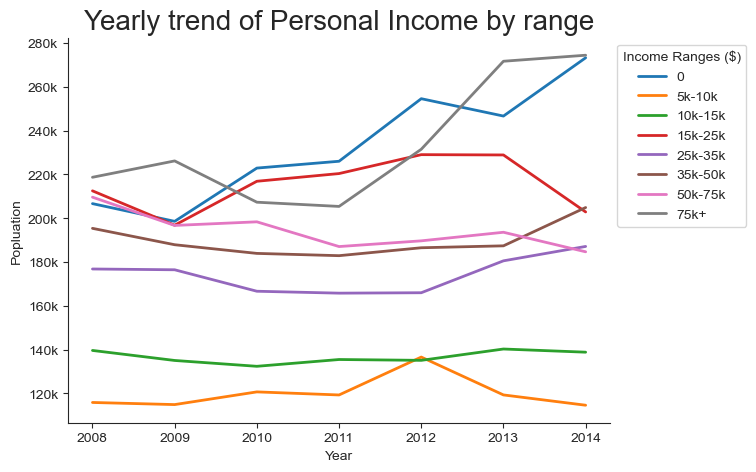

In [64]:
sns.set_style('ticks')

df_year.plot(kind='line', linewidth=2, figsize=(7,5))
plt.ylabel('Popluation')
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, pos : f'{(x/1000):.0f}k'))
sns.despine()
plt.title('Yearly trend of Personal Income by range',fontsize=20)
plt.xticks(df_year.index)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), title='Income Ranges ($)', markerscale=1.5)
plt.show()


- There was not much change of other ranges, but for No Income and above $75k Income Group has been surged.

  It implies income gap has been rising .

In [65]:
# which group consist top population
df_year.idxmax(axis=1)

Year
2008    75k+
2009    75k+
2010       0
2011       0
2012       0
2013    75k+
2014    75k+
dtype: object

- No Income or $75k+ group has always been most population 

### Education level and income range

In [66]:

df_edu = df.pivot_table(values='Population Count',aggfunc='sum',index='Educational Attainment',columns='income')

In [67]:
df_edu =df_edu.reindex(sorted, axis=1)
df_edu = df_edu.T

In [68]:
deg_sorted= ['No high school diploma','High school or equivalent', 
             'Some college, less than 4-yr degree',"Bachelor's degree or higher"]

In [69]:
df_edu =df_edu.reindex(deg_sorted, axis=1)

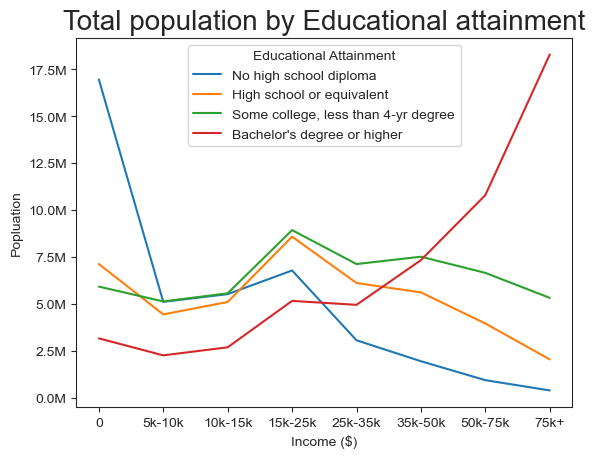

In [70]:
df_edu.plot(kind='line')
plt.title('Total population by Educational attainment', fontsize=20)
plt.xlabel('Income ($)')

plt.ylabel('Popluation')
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, pos : f'{(x/1000000):.1f}M'))


- Look up if there is Income difference by education level.

    above $50k+, you can see there is spike of Bachelor's degree or higher group 
    
    Which means higher education will be able to return higher salary

## Is there difference of education by gender?

In [71]:
df_gen = df.pivot_table(index='Gender',values='Population Count',aggfunc='mean',columns='Educational Attainment')
df_gen

Educational Attainment,Bachelor's degree or higher,High school or equivalent,No high school diploma,"Some college, less than 4-yr degree"
Gender,,,,
Female,229730.612069,160992.170543,142307.863309,210651.643411
Male,243208.043478,183263.933884,141135.662162,193514.976744


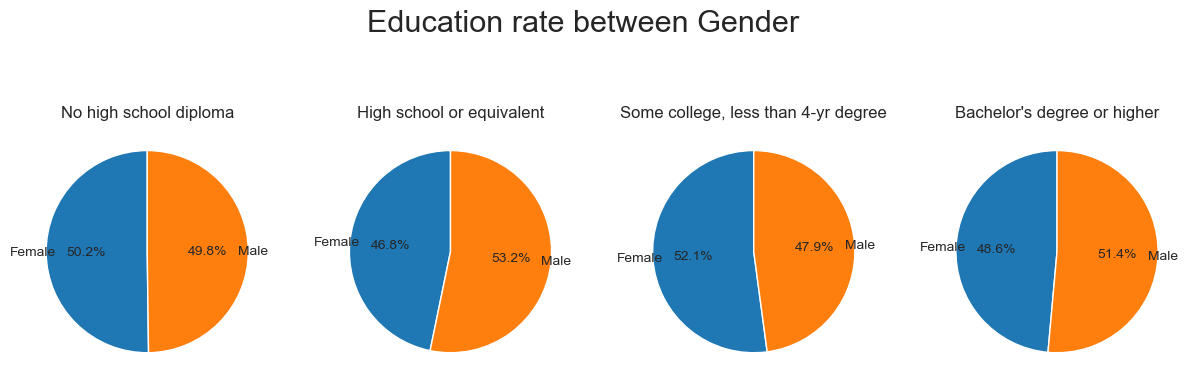

In [72]:
sns.set_style('ticks')
fig, ax = plt.subplots(1,4,figsize=(15,5))

for i, deg in enumerate(deg_sorted):
    df_plot = df_gen[deg]
    ax[i].pie(df_plot,autopct='%1.1f%%', startangle=90, labels=['Female','Male'], labeldistance=0.9 )
    ax[i].set_title(deg)


plt.suptitle("Education rate between Gender",fontsize=22)
plt.show()

-  Not much difference of education level between male and female

## How about income difference by gender

In [73]:
df_gen_income = df.groupby(['Gender','income'])[['Population Count']].sum()
df_gen_income


Population Count
Gender income                   
Female 0              20041224.0
       10k-15k        10780235.0
       15k-25k        14936483.0
       25k-35k        10012877.0
       35k-50k        10132075.0
       50k-75k         9536403.0
       5k-10k         10574991.0
       75k+            8357308.0
Male   0              13119952.0
       10k-15k         8080390.0
       15k-25k        14506756.0
       25k-35k        11218029.0
       35k-50k        12257813.0
       50k-75k        12789912.0
       5k-10k          6347251.0
       75k+           17675268.0

In [74]:
df_gen_income=df_gen_income.reindex(sorted, level=1)
df_gen_income

Population Count
Gender income                   
Female 0              20041224.0
       5k-10k         10574991.0
       10k-15k        10780235.0
       15k-25k        14936483.0
       25k-35k        10012877.0
       35k-50k        10132075.0
       50k-75k         9536403.0
       75k+            8357308.0
Male   0              13119952.0
       5k-10k          6347251.0
       10k-15k         8080390.0
       15k-25k        14506756.0
       25k-35k        11218029.0
       35k-50k        12257813.0
       50k-75k        12789912.0
       75k+           17675268.0

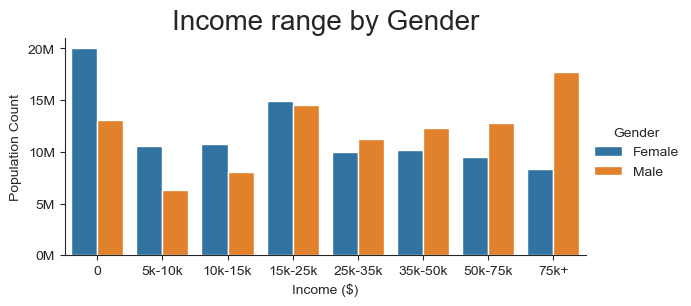

In [75]:
sns.set_style('ticks')

sns.catplot(df_gen_income, kind='bar',x= 'income', y='Population Count', hue='Gender', height=3, aspect=2)
plt.xlabel('Income ($)')
plt.title('Income range by Gender', fontsize=20)
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, pos : f'{(x/1000000):.0f}M'))


- Male tends to get higher salary than Female